In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
dataset_path = "C:/Users/heyha/Downloads/archive"

In [5]:
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 12000 images belonging to 5 classes.
Found 3000 images belonging to 5 classes.


In [6]:
def plot_images_from_generator(generator, class_names):
    images, labels = next(generator)
    plt.figure(figsize=(12, 12))
    for i in range(min(batch_size, 16)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

In [7]:
class_names = list(train_generator.class_indices.keys())
print("class names:", class_names)


class names: ['almirah_dataset', 'chair_dataset', 'fridge dataset', 'table dataset', 'tv dataset']


training images:


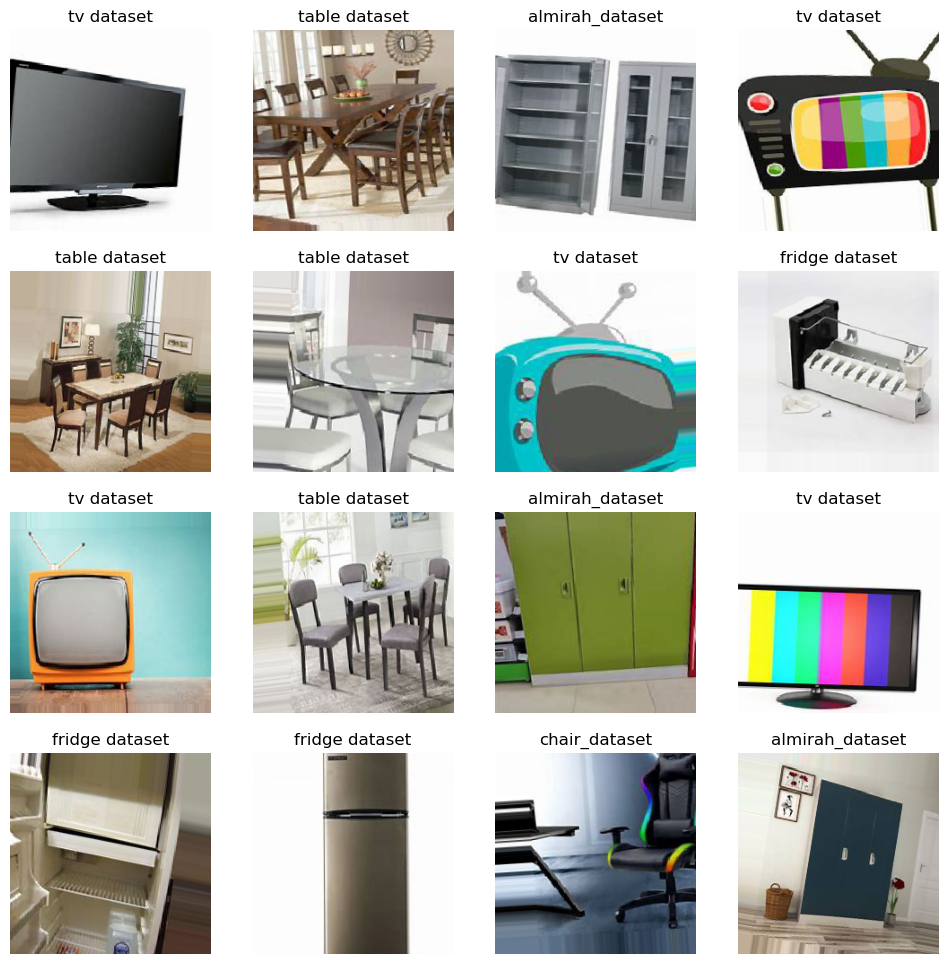

In [8]:
print("training images:")
plot_images_from_generator(train_generator, class_names)


validation images:


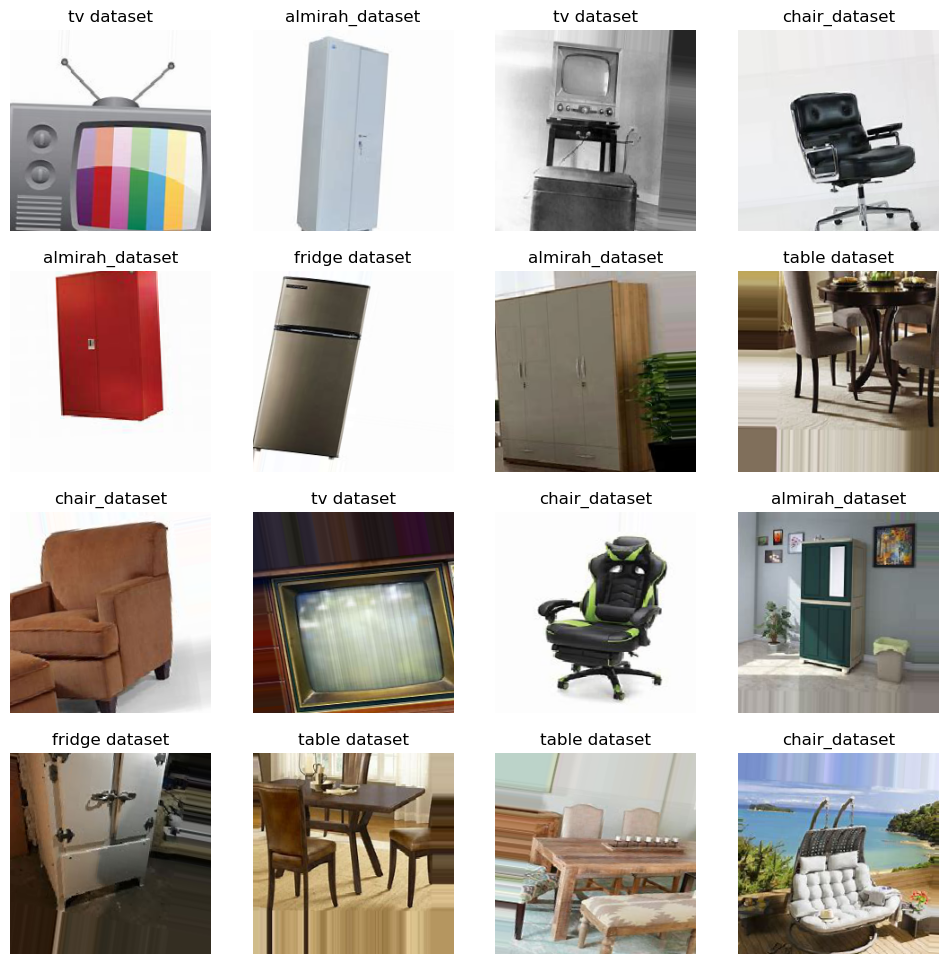

In [9]:
print("validation images:")
plot_images_from_generator(validation_generator, class_names)


In [10]:
def build_custom_cnn(input_shape=(img_height, img_width, 3), num_classes=5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [11]:
def train_model(model, train_data, val_data, epochs=15, learning_rate=0.001):
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=[early_stopping]
    )
    return history

In [ ]:
custom_model = build_custom_cnn(num_classes=train_generator.num_classes)
custom_history = train_model(custom_model, train_generator, validation_generator)

Epoch 1/15
156/375 [===========>..................] - ETA: 5:49 - loss: 1.3726 - accuracy: 0.4655